In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os
from scipy.special import erf

alphas = np.linspace(1e-4, 1.5,100)

betas = np.linspace(-max(alphas), max(alphas),100)

def overlap2(alpha,beta):
    return np.exp(-(alpha-beta)**2)
def P(n,alpha,beta):
    if n==0:
        return overlap2(alpha,beta)
    else:
        return 1-overlap2(alpha,beta)
    

def kennedy(alpha):
    p=0
    for n in [0,1]:
        p+=np.max([P(n,ph*alpha,-alpha) for ph in [-1,1]])
    return p/2

def kennedy_opt(beta, alpha):
    p=0
    for n in [0,1]:
        p+=np.max([P(n,ph*alpha,beta) for ph in [-1,1]])
    return 1-p/2

from scipy.optimize import *
kennedys_opts = 1- np.array([minimize(kennedy_opt, -alpha, args=(alpha)).fun for alpha in alphas])

kenns = np.array([kennedy(a) for a in alphas])

def homodyne(alpha):
    return (1+erf(np.sqrt(2)*alpha))/2

def helstrom(alpha):
    return (1+np.sqrt(1-overlap2(alpha,-alpha)))/2

In [11]:
import os 

In [17]:
os.getcwd()

'/home/giq/Desktop/PhD-thesis/thesis/scripts/3'

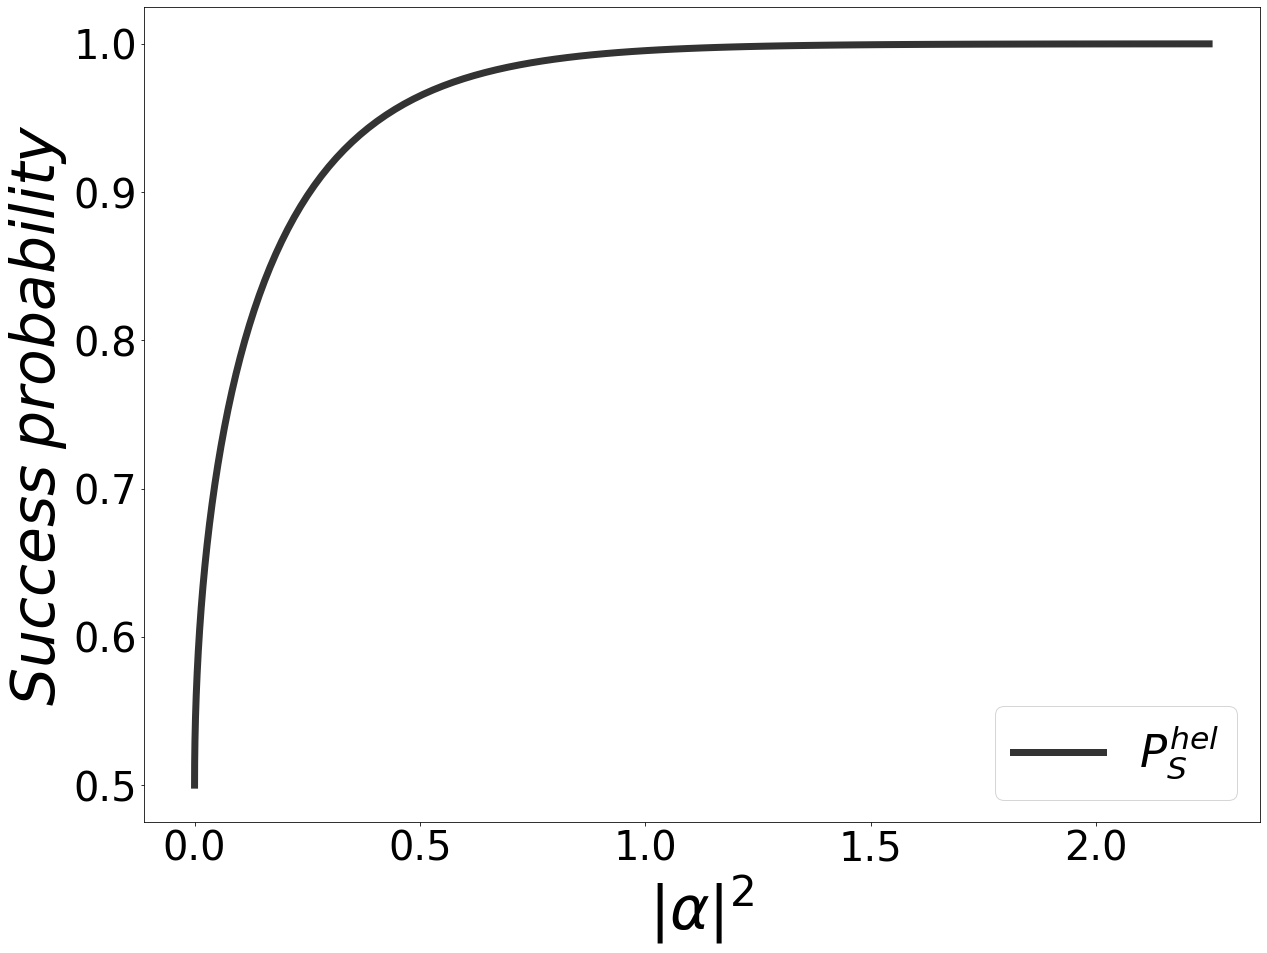

In [19]:
plt.figure(figsize=(20,15))
LS=40
lw=7
tra = 0.8
xalphas = alphas**2
ax=plt.subplot()
#ax.plot(xalphas,homodyne(alphas), color="blue",linewidth=lw,label=r'$P_S^{hom}$', alpha=tra)
#ax.plot(xalphas, kennedys_opts, color="red",linewidth=lw, label=r'$P_S^{ken-opt}$', alpha=tra)
ax.plot(xalphas, helstrom(alphas), color="black", linewidth=lw, label=r'$P_S^{hel}$', alpha=tra)
ax.set_xlabel(r'$|\alpha|^2$',size=int(1.5*LS))
ax.set_ylabel(r'$Success\; probability$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.legend(prop={"size":45})

path_dir = "../../Slides/"
os.makedirs(path_dir,exist_ok=True)
plt.savefig(path_dir+"helstrom.png",dpi=150)

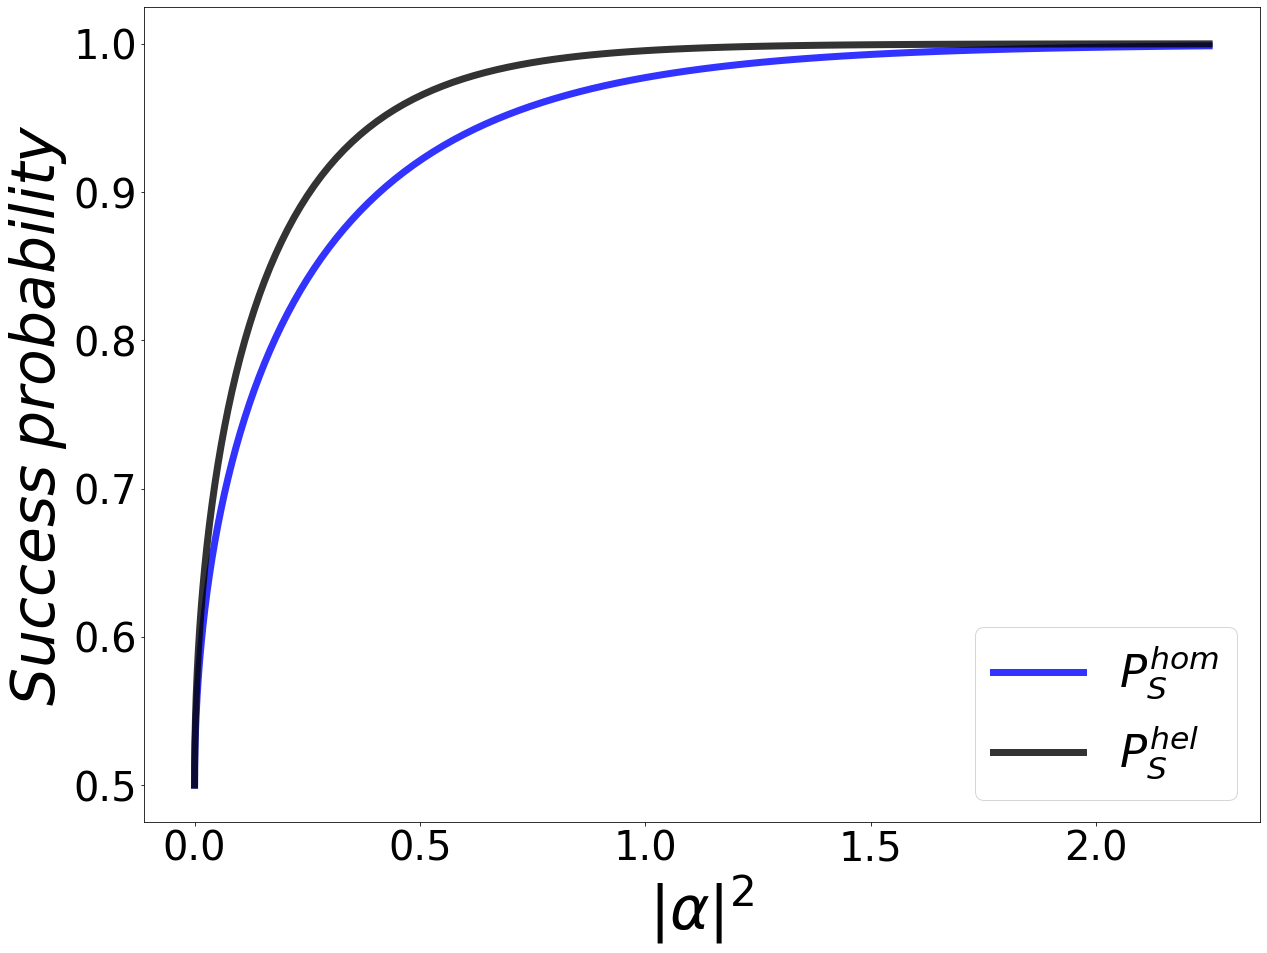

In [20]:
plt.figure(figsize=(20,15))
LS=40
lw=7
tra = 0.8
xalphas = alphas**2
ax=plt.subplot()
ax.plot(xalphas,homodyne(alphas), color="blue",linewidth=lw,label=r'$P_S^{hom}$', alpha=tra)
#ax.plot(xalphas, kennedys_opts, color="red",linewidth=lw, label=r'$P_S^{ken-opt}$', alpha=tra)
ax.plot(xalphas, helstrom(alphas), color="black", linewidth=lw, label=r'$P_S^{hel}$', alpha=tra)
ax.set_xlabel(r'$|\alpha|^2$',size=int(1.5*LS))
ax.set_ylabel(r'$Success\; probability$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.legend(prop={"size":45})

path_dir = "../../Slides/"
os.makedirs(path_dir,exist_ok=True)
plt.savefig(path_dir+"helstrom_homodyne.png",dpi=150)

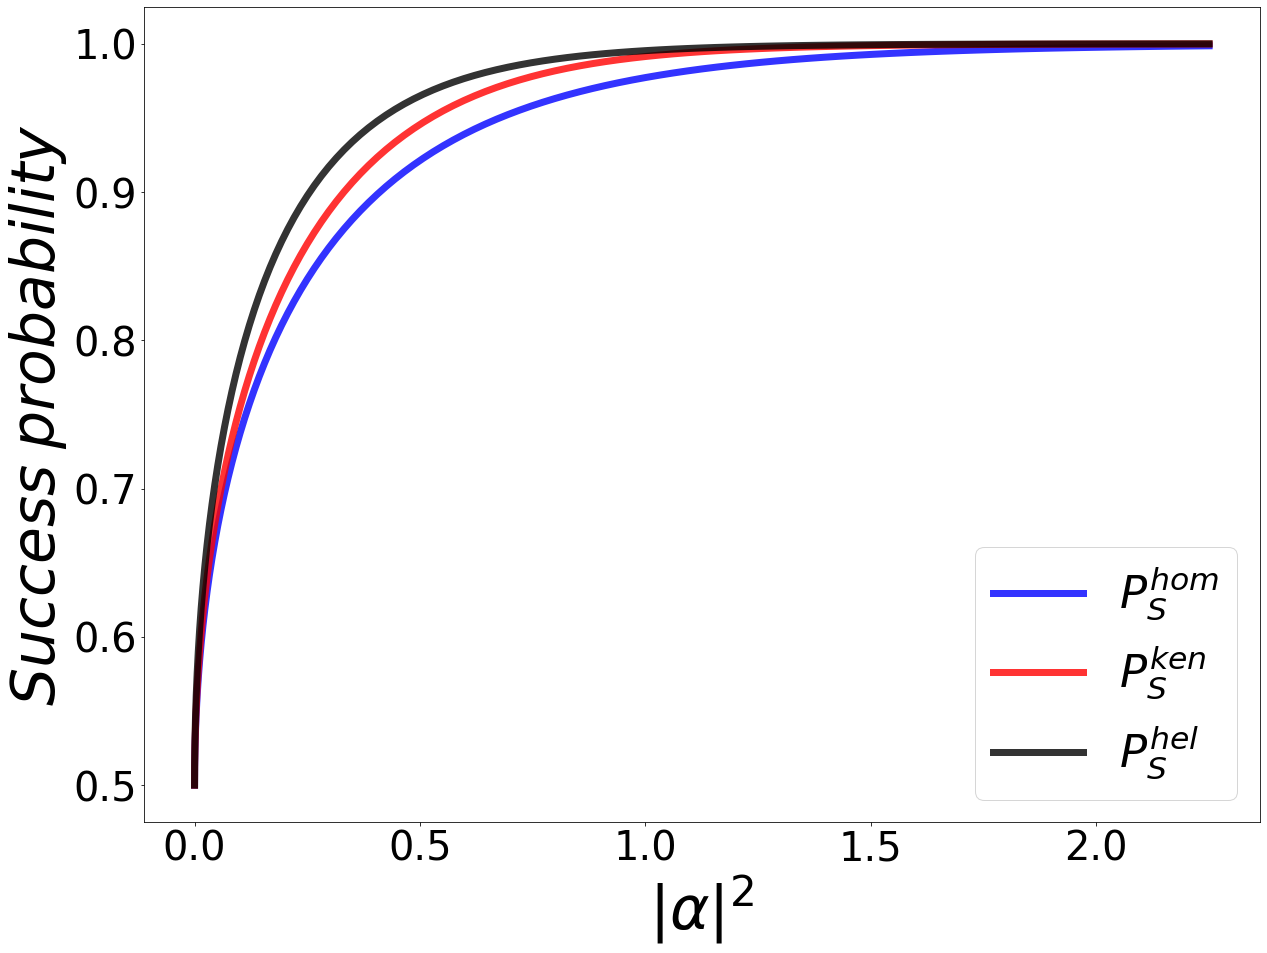

In [66]:
plt.figure(figsize=(20,15))
LS=40
lw=7
tra = 0.8
xalphas = alphas**2
ax=plt.subplot()
ax.plot(xalphas,homodyne(alphas), color="blue",linewidth=lw,label=r'$P_S^{hom}$', alpha=tra)
ax.plot(xalphas, kennedys_opts, color="red",linewidth=lw, label=r'$P_S^{ken}$', alpha=tra)
ax.plot(xalphas, helstrom(alphas), color="black", linewidth=lw, label=r'$P_S^{hel}$', alpha=tra)
ax.set_xlabel(r'$|\alpha|^2$',size=int(1.5*LS))
ax.set_ylabel(r'$Success\; probability$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.legend(prop={"size":45})

path_dir = "../../Slides/"
os.makedirs(path_dir,exist_ok=True)
plt.savefig(path_dir+"helstrom_homodyne_kennedy.png",dpi=150)

In [57]:
pss = np.load("/home/giq/Desktop/dynamo/data_dp/ps_upto10_20_30.npy")

In [58]:
amps = np.arange(0.01,1.5,.01)


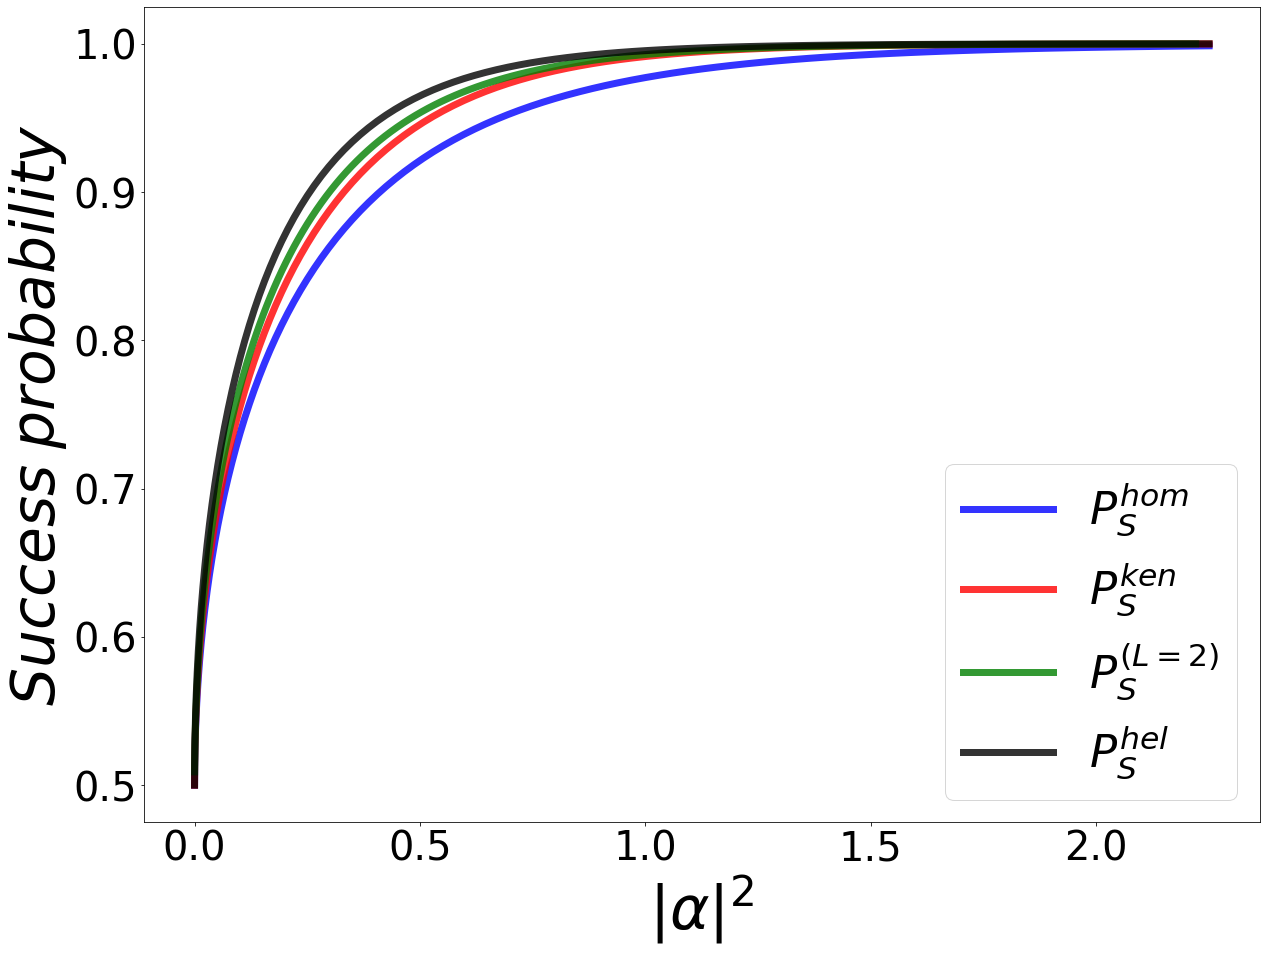

In [67]:
plt.figure(figsize=(20,15))
LS=40
lw=7
tra = 0.8
xalphas = alphas**2
ax=plt.subplot()
ax.plot(xalphas,homodyne(alphas), color="blue",linewidth=lw,label=r'$P_S^{hom}$', alpha=tra)
ax.plot(xalphas, kennedys_opts, color="red",linewidth=lw, label=r'$P_S^{ken}$', alpha=tra)
plt.plot(amps**2,1-pss[2,:], color="green",linewidth=lw, label=r'$P_S^{(L=2)}$', alpha=tra)

ax.plot(xalphas, helstrom(alphas), color="black", linewidth=lw, label=r'$P_S^{hel}$', alpha=tra)
ax.set_xlabel(r'$|\alpha|^2$',size=int(1.5*LS))
ax.set_ylabel(r'$Success\; probability$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.legend(prop={"size":45})
path_dir = "../../Slides/"
os.makedirs(path_dir,exist_ok=True)
plt.savefig(path_dir+"helstrom_homodyne_kennedy_dolL2.png",dpi=150)


In [ ]:











plt.figure(figsize=(10,10))
LS=20
lw=5
tra = 0.8
ax=plt.subplot()
ax.plot(xalphas,helstrom(alphas)-np.array(kenns), color="green",linewidth=lw ,label=r'$P_S^{hel}-P_S^{ken}$', alpha=tra)
ax.plot(xalphas,helstrom(alphas)-homodyne(alphas), color="blue",linewidth=lw,label=r'$P_S^{hel}-P_S^{hom}$', alpha=tra)
ax.plot(xalphas, helstrom(alphas)-kennedys_opts, color="red",linewidth=lw, label=r'$P_S^{hel}-P_S^{ken-opt}$', alpha=tra)
ax.set_xlabel(r'$|\alpha|^2$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.legend(prop={"size":25})
plt.savefig(path_dir+"kennedy_compa_diff_hel.pdf")


#

### landascape Kennedy
B=3.5
betas = np.linspace(-B,B,1000)
sbeta = 1-np.array([kennedy_opt(b, 0.2) for b in betas])
plt.figure(figsize=(10,10))
LS=20
lw=5
tra = 0.8
ax=plt.subplot()
ax.plot(betas, sbeta, color="green",linewidth=lw, alpha=tra, label=r'$P_s^{\beta-ken}(\alpha,\beta)$')
ax.set_xlabel(r'$\beta$',size=int(1.5*LS))
ax.axhline(homodyne(0.2), alpha=tra,linewidth=lw, label=r'$P_s^{hom}(\alpha)$')
ax.axvline(0.2,linestyle ='--',alpha=tra,linewidth=lw, color="black",label=r'$\beta = \pm \alpha$')
ax.axvline(-0.2, linestyle ='--', alpha=tra,linewidth=lw, color="black")#%, label=r'$\beta = -\alpha$')

# ax.set_ylabel(,size=int(1.5*LS))
ax.legend(prop={"size":25})
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.legend(prop={"size":20}, loc="upper left")
path_dir = "Figures/312/"
os.makedirs(path_dir,exist_ok=True)
plt.savefig(path_dir+"kenn_landscape.pdf")







#
